In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import aplpy
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#from astropy import log
#log.setLevel('ERROR')
np.seterr(all='ignore')

sns.set(style='ticks', 
        rc={'font.family'          : 'serif',
            'text.usetex'          : True,
            'axes.axisbelow'       : True,
            'mathtext.fontset'     : 'cm',
            'mathtext.default'     : 'regular',
            'xtick.direction'      : 'in',
            'ytick.direction'      : 'in',
       })

pal = sns.color_palette('colorblind')
dark = sns.color_palette('dark')
sns.set_palette(pal)

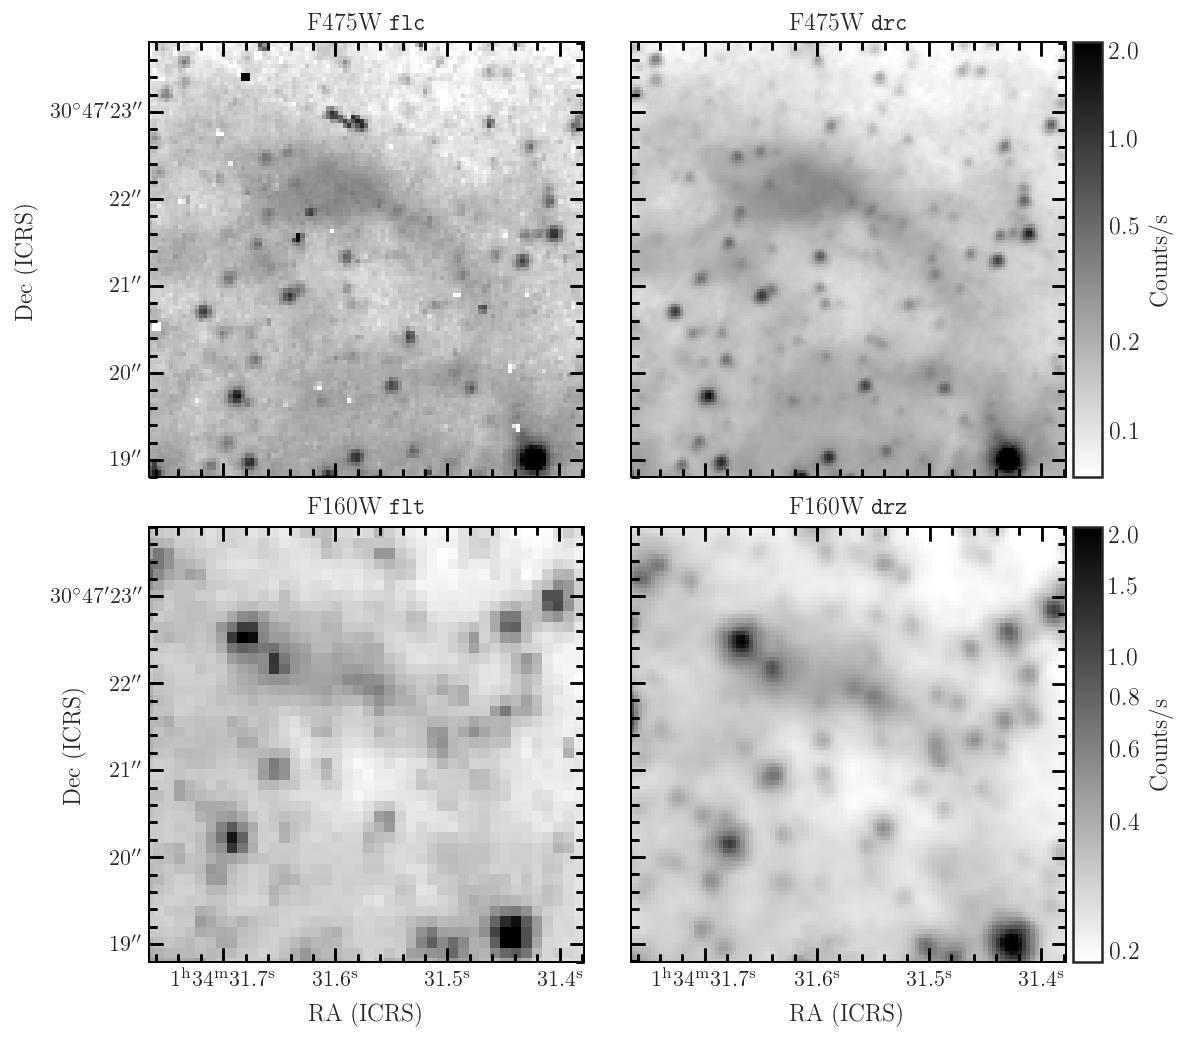

In [2]:
fig = plt.figure(figsize=(8.6, 7.2))
f0 = aplpy.FITSFigure('cutouts/F475W_flc_cutout.fits', figure=fig, north=True, subplot=(2,2,1))
f1 = aplpy.FITSFigure('cutouts/F475W_drc_cutout.fits', figure=fig, north=True, subplot=(2,2,2))
f2 = aplpy.FITSFigure('cutouts/F160W_flt_cutout.fits', figure=fig, north=True, subplot=(2,2,3))
f3 = aplpy.FITSFigure('cutouts/F160W_drz_cutout.fits', figure=fig, north=True, subplot=(2,2,4))

for f in [f0, f1, f2, f3]:
    f.set_theme('publication')
    f.recenter(23.63155, 30.78925, radius=2.5/3600)

min_opt, max_opt = 0.07, 2.15
min_ir, max_ir = 0.189, 2.1
f0.show_grayscale(stretch='log', interpolation='nearest',
                  vmin=min_opt, vmax=max_opt)
f1.show_grayscale(stretch='log', interpolation='nearest',
                  vmin=min_opt, vmax=max_opt)
f2.show_grayscale(stretch='log', interpolation='nearest',
                  vmin=min_ir, vmax=max_ir)
f3.show_grayscale(stretch='log', interpolation='nearest',
                  vmin=min_ir, vmax=max_ir)

#f1.add_scalebar(1/3600, label='$1^{\prime\prime}$', corner='top right')
f1.add_colorbar()
f3.add_colorbar()
f1.colorbar.set_axis_label_text('Counts/s')
f3.colorbar.set_axis_label_text('Counts/s')
f1.colorbar.set_ticks([0.1, 0.2, 0.5, 1, 2])
f3.colorbar.set_ticks([0.2, 0.4, 0.6, 0.8, 1, 1.5, 2])
f0.set_title(r'F475W $\mathrm{\tt{flc}}$')
f1.set_title(r'F475W $\mathrm{\tt{drc}}$')
f2.set_title(r'F160W $\mathrm{\tt{flt}}$')
f3.set_title(r'F160W $\mathrm{\tt{drz}}$')

aplpy.AxisLabels(f0).set_ypad(-2)
aplpy.AxisLabels(f2).set_ypad(-1)

aplpy.AxisLabels(f0).hide_x()
aplpy.TickLabels(f0).hide_x()
aplpy.AxisLabels(f1).hide()
aplpy.TickLabels(f1).hide()
aplpy.AxisLabels(f3).hide_y()
aplpy.TickLabels(f3).hide_y()

fig.tight_layout(w_pad=1, h_pad=2)
fig.savefig('survey_paper_figures/4panel_img.pdf', dpi=300, bbox_inches='tight')